# CS 237 Spring 2020  Homework Five Solution

### Due date: PDF file due Thursday March 5th @ midnight in GradeScope with 6-hour grace period

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 6 hours grace period)

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 8 are analytical problems about last
week's material, and the remaining problems are coding problems which will be discussed in lab next week. 


In [3]:
# Here are some imports which will be used in code that we write for CS 237
 

# Imports potentially used for this lab


import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi,log,floor       # import whatever you want from math
from random import seed, random
from collections import Counter

%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# This draws a useful bar chart for the distribution of the list of integers in outcomes

def draw_distribution_from_outcomes(outcomes, title='Experimental Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#draw_distribution_from_outcomes([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution_of_random_variable(Rx, Px, title='Probability Mass Function', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,Px,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#draw_distribution_of_random_variable([1,2,3,4], [0.25,0.35,0.15,0.25])

p = 0.14159234368

#                                                                                   ||||||||||||||||
# Notice how we gave strings as labels for the outcomes:                            vvvvvvvvvvvvvvvv

#draw_distribution_of_random_variable( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
 


## Analytical Problem Instructions

The first few problems ask you to "describe" a random variable, which means:

> (i)   Give $R_X$ (you may schematize it if it is very complicated or infinite);<br>
> (ii)  List out the values of $P_X$ corresponding to each element of $R_X$; <br>
> (iii)  Draw the PMF, using the function <code>draw_distribution_of_random_variable</code> provided in the previous cell. <br>


A nice way to approach these is to do any complicated calculations in Python and then if you have
to change something you won't have to redo all the calculations. Plus, you will make fewer
mistakes in calculation. However, there is no need to do this for simpler problems. 

I also **strongly** recommend creating new variables for each problem, for example Rx1, Rx2, etc. for
the range of the random variable in problems 1, 2, etc.   That way, you won't have problems if you
forget and use the wrong variable! You can also refer to previous results without problems. 

Following Problem One is an example of what I mean (it is a simple problem, but I am showing you
how you could approach it). 

You are not **required** to do it this way, but I *encourage* you to do something similar. 

## Example Problem


*Describe* the random variable X = "the number of heads showing on 2 flipped fair coins"


Solution:

(i)   Rx = [0, 1, 2]
(ii)  Px = [0.25 0.5  0.25]
(iii)


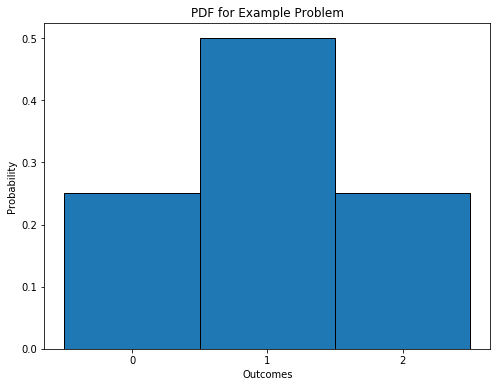

In [4]:
Rx0 = [0,1,2]
    
Px0 = [ C(2,k)*0.5*0.5 for k in Rx0 ]

print("Solution:\n")
print("(i)   Rx =",Rx0)
print("(ii)  Px =",np.around(Px0,4))             # in case you get complicated decimals, round to 4 places
print("(iii)")

draw_distribution_of_random_variable( Rx0, Px0, title='PDF for Example Problem')

## Problem One

All the random variables we studied in lecture were "with replacement"; however, random variables can
implement any random experiment, including those involving choices "without replacement," as we explore here. 

You are not responsible for the Hypergeometric distribution per se, but we
will explore the random experiment which forms the basis for the distribution. 
This problem is a specific example of the Hypergeometric (and you should look at
the formula for $P_X$ given in the textbook to do the problem -- it is very similar to the Poker probabilities!). 

You have a bag that contains 4 blue marbles and 6 red marbles. You choose 7 marbles at random (without replacement). 

Let $X$ = "The number of blue marbles in your selection"

*Describe* the random variable $X$. 


**Solution:**
    
$$P(X = x)\,=\, {{4\choose x}{6\choose 7-x}\over {10\choose 7  }}$$

Solution:

(i)   Rx = [0, 1, 2, 3, 4]
(ii)  Px = [0.0, 0.0333, 0.3, 0.5, 0.1667]
(iii)


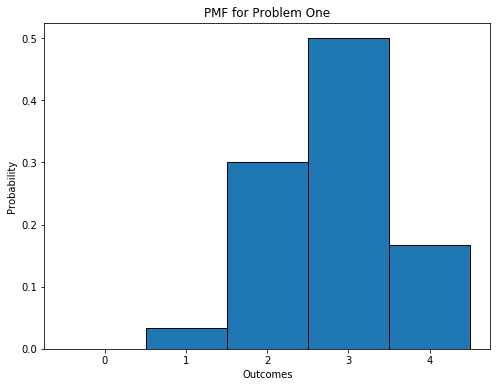

In [5]:
b1 = 4
r1 = 6
k1 = 7

Rx1 = list(range(b1+1))    # note that you can't draw more than 4 red balls

Px1 = [ (C(b1,x)*C(r1,k1-x)/C(10,k1))  for x in Rx1 ]

print("Solution:\n")
print("(i)   Rx =",Rx1)
print("(ii)  Px =",list(np.around(Px1,4)))    # in case you get complicated decimals, round to 4 places
print("(iii)")                          # Remember that numpy functions can be applied to a list as well!

draw_distribution_of_random_variable( Rx1, Px1, title='PMF for Problem One')

## Problem Two

We will again explore a random variable (which has no name, I just made it up) which involves selection without replacement. 

Suppose you deal a 5-card hand from a standard deck which has been shuffled well. 

Let $X$ = "The number of Spades occurring in the hand." 

*Describe* the random variable $X$. 

**Solution:**
    
$$P(X = x)\,=\, {{13\choose x}{39\choose 5 - x}\over {52\choose 5  }}$$

Solution:

(i)   Rx = [0, 1, 2, 3, 4, 5]
(ii)  Px = [0.2215 0.4114 0.2743 0.0815 0.0107 0.0005]
(iii)


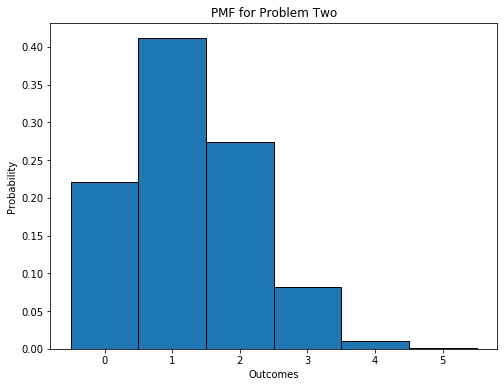

In [6]:
Rx2 = [0,1,2,3,4,5]

def f2(k):
     return (C(13,k)*C(39,5-k)/C(52,5))

Px2 = [ f2(k)  for k in Rx2 ]

print("Solution:\n")
print("(i)   Rx =",Rx2)
print("(ii)  Px =",np.around(Px2,4))    # in case you get complicated decimals, round to 4 places
print("(iii)")

draw_distribution_of_random_variable( Rx2, Px2, title='PMF for Problem Two')

## Problem Three

We refer to the random variable $X$ from Problem Two. 

<i>Describe</i> the random variable $Y = 2X + X - 1$


Hint: when more than one instance of a random variable is involved, it is often useful to draw a matrix of all possibilities.  Consider the two instances
of $X$ (i.e., two "pokes" at the same random variable) and draw a matrix of each of the possible outputs of the random variables, one along the rows and one along the columns.

|    |  0  |  1  |  2  |  3  |  4  |  5  |
|----|-----|-----|-----|-----|-----|-----|
|  <b>0</b> |    |     |    |     |     |     | 
|  <b>1</b> |    |     |    |     |     |     | 
|  <b>2</b> |    |     |    |     |     |     |
|  <b>3</b> |    |     |    |     |     |     |  
|  <b>4</b> |    |     |    |     |     |     | 
|  <b>5</b> |    |     |    |     |     |     |      

For each slot in the resulting matrix, you can figure out the probabilities
by multiplication (since the two instances of X are independent), as shown in class. The value in each slot will be $2X + X - 1$. 
Some outcomes will be the same, and you will have to add the probabilities
to get the PMF of Y. 

I would do this calculation in Python, but it is up to you. 
If you use Python, you might want to use a dictionary to keep track of the values in the PMF. 


Solution:

(i)   Rx = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
(ii)  Px = [0.0491 0.0911 0.1519 0.1873 0.176  0.1465 0.0977 0.0561 0.0277 0.0112
 0.0039 0.0011 0.0003 0.     0.     0.    ]
(iii)


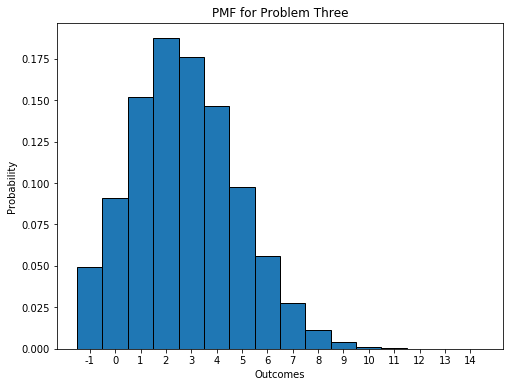

In [7]:
Rx3 = list(range(-1,15))

dict = {}

for k in Rx3:
    dict[k] = 0

for r in range(len(Rx2)):
    for c in range(len(Rx2)):
        y = 2*Rx2[r] + Rx2[c] - 1
        dict[y] += Px2[r] * Px2[c]
Px3 = list(dict.values())

print("Solution:\n")
print("(i)   Rx =",Rx3)
print("(ii)  Px =",np.around(Px3,4))    # in case you get complicated decimals, round to 4 places
print("(iii)")

draw_distribution_of_random_variable( Rx3, Px3, title='PMF for Problem Three')

## Problem 4 (Independence of RVs)

(A)  Let  $X$ = "the number of dots showing on a single thrown die" and let

$$Y\,=\,X_1 + X_2.$$

(The subscripts here do not indicate different random variables, but two
different instances -- "pokes" as I say informally in lecture -- of the *same* random variable.
This is a fairly common notation.)

 Show that the random variables $Y$ and $X_1$ are *not independent*. 

(B) In order to encode "events" from the first part of the course, we will use
the technique of "indicator Bernoulli random variables" from the textbook. 

$$\begin{equation}
        I_A = \begin{cases}
                   1               & \text{ if $X_1$ returns an even number } \\
                   0              & \text{otherwise}
               \end{cases}
\end{equation}$$

and finally let

$$\begin{equation}
        I_B = \begin{cases}
                   1               & \text{ if } X_1 < X_2 \\
                   0              & \text{otherwise}
               \end{cases}
\end{equation}$$

Are the random variables $I_A$ and $I_B$ independent?  Show all your work (it
should be very familiar to you, once you think about the notation), including
the matrix (which should be very small!). 

(C)  Suppose you have two independent binomial random variables as follows:

$$Z_1 = Binomial(N_1,p)\quad\quad Z_2 = Binomial(N_2, p)$$

Note that $N_1$ and $N_2$ are possibly different, but the $p$ is the same
in both cases. 

What is the distribution of the random variable $Z_3\,=\,Z_1 + Z_2$?

You must give the answer and your justification for full credit. 

<b>Solution:</b>


(A) All that is necessary is to examine the matrix showing
all possible outcomes for $X_1$ and $X_2$, and find a slot where
 the multiplication rule for independence does not work. 
Thus, suppose $X_1 = 2$, $X_2 = 3$, so that $Y = 5$. 
Here is the appropriate matrix, with $R_{X_2}$ defining the rows and
$R_{X_1}$ defining the columns. 

|           |  1  |  2  |  <b>3</b>  |  4  |  5  |  6  | 
|-----------|-----|-----|-----|-----|-----|-----| 
|  1 |     |     |   4  |   5  |    |     | 
|  2 |   3  |  4   |  5   |   6  |  7   |    8 | 
|  3 |     |  5   |  6   |     |     |     |  
|  4 |  5   |     |   7  |     |     |     |
|  5 |     |     |   8  |     |     |     | 
|  6 |     |     |   9  |     |     |     | 

Clearly 

$$P(X_1 = 2) \,=\, {6 \over 36} \,=\, {1 \over 6} $$

$$P(Y = 5) \,=\, {4 \over 36} \,=\, {1 \over 8} $$

But 

$$P(Y = 5, X_1 = 2) \, =\, {1 \over 36} \,\ne \, P(Y=5)\cdot P(X_1 = 2)\,=\, {1\over 58}.$$


(B) Examination of the matrix in part (A) should make it clear that

$$\begin{aligned}
     R_{I_A}\, &=\, \{ 0, 1 \} \\
     P_{I_A}\, &=\, \{ 1/2, 1/2 \} \\ 
               &               \\
     R_{I_B}\, &=\, \{ 0, 1 \} \\
     P_{I_B}\, &=\, \{ 17/36, 15/36 \} \\ 
\end{aligned}$$


Outcomes for $I_A$ (rows) and $I_B$ (columns):

|    |  0  |  1  |  
|----|-----|-----|
|  0 |  $P_{00}$  |  $P_{01}$   |
|  1 |  $P_{10}$   | $P_{11}$    |  


Now we just consider one of the cases, say the lower-right slot $P_{11}$:

$$P_{11} = P(\text{ $X_1$ is even and $X_1 < X_2$ } )\,=\, P(I_A = 1, I_B = 1)\,=\, {1 \over 6} \,=\, 0.6667 $$

but

$$P( X_1  = 1 )\cdot P( X_2  = 1 )\,=\,  {1 \over 2}\cdot {15 \over 36} \,=\,  {15 \over 72} \,=\, 0.2083  $$

**Not Independent!**

You can see that this is just the same argument we used with events, but in a different notation. 

(C) $$Z_3\sim Binomial(N_1+N_2,p).$$  

This can be proved formally or informally using an argument involving the "canonical problem," which in this case is flipping coins. 

Informal Proof:

Suppose you want to "poke" the random variable $Z_1 + Z_2$ to get a value:  First you flip $N_1$ coins,
where the probability of heads is $p$, and count the number of heads. Then ou flip $N_2$ coins,
where the probability of heads is $p$, and count the number of heads, and add these two values together.
This is precisely the same thing as flipping $N_1 + N_2$ such coins, and counting the number of heads.
Whether you separate it into $N_1$ flips followed by $N_2$ flips or do them all at once, the
outcome is clearly the same. 

One could make this more formal, by expressing this same
argument in terms of the sum of $N_1+N_2$ Bernoulli RVs.  

More formal ways to prove this are
discussed in the textbook, <a href ="https://www.probabilitycourse.com/chapter3/3_1_5_special_discrete_distr.php">Example 3.7</a>



## Problem 5 (Binomial)


(A) "If you roll a die 5 times, what is the probability that on exactly two of these rolls you get either a 5 or a 6?"

(B) If two fair dice are rolled 10 times, what is the probability of at least one 6 (on either die) in exactly five of these 10 rolls?

(C) Suppose that each day the price of a stock moves up 1/8th of a point with probability 1/3 and moves down 1/8th of the point with probability 2/3. If the price fluctuations from day to day are independent and identically distributed, what is the probability that after 6 days the stock has its original price?

Hint for (C): you could draw a tree, but it is easier to answer the following question: how many moves up and how many moves down result in no change in the stock price after 3 days?
 

<strong>Solution:</strong>  

(A) The probability of a 5 or 6 showing on any one role is 1/3, so we seek

$$P(X=2) \text{ for } X\sim B(5,1/3)$$

or

$$ \binom{5}{2} (1/3)^2 (2/3)^3 = 0.3292$$

(B) The probability of at least one 6 showing on two dice is $11/36$ so we seek


$$P(Y=5) \text{ for } Y\sim B(10,11/36)$$

or

$$ \binom{10}{5} (11/36)^5 (25/35)^5 = 0.1084$$


(C)  If S is the number of days the stock moves up, and D is the number of days the stock moves down, then the price will be the same after 6 days if and only if S = D = 3. Let success = stock moves up; then this is a binomial B(6,1/3) and the probability that the stock stays the same is

P(X = 3) = C(6,3) (1/3)^3 (2/3)^3 = 0.2195.

In [8]:
C(10,5)* (11/36)**5 * (25/35)**5

0.12479905141920626

## Problem 6


Suppose numbers in the range $[0..1)$ are randomly and independently selected with replacement
and rounded to 3 decimal places. Therefore we can assume that all possible combinations of 3 digits after the decimal point are equally likely. 

For each of these, give the discrete distribution involved, phrase it as a probability in the form `P(...X....)` and answer the question. 

(a) What is the probability that the first selection is no more than 0.345?

(b) What is the probability that 0.345 occurs at least twice in the first 1000 selections?

(c) What is the probability that 0.345 is selected for the first time on the 1000th selection?

Hint: This uses 3 of the 4 discrete distributions we studied last Thursday (2/20).  

<strong>Solution:</strong>  
    
(A)  (Bernoulli) Since there are 346 numbers in [0.000 .. 0.345], the probability is 0.346.

(B)  (Binomial) This is P(X >= 2) for X ~ B(1000,1/1000), so

$$1.0 - P(X=0)- P(X=1)\, =\, 1.0 - \binom{1000}{0}(0.001)^0 (0.999)^{1000} - \binom{1000}{1}(0.001)^1 (0.999)^{999}\,=\,0.2642$$

(C) (Geometric)

$$(0.999)^{999} (0.001)^1\,=\, 3.68 * 10^{-4}$$

In [9]:
print(1.0 - (0.999 ** 1000) - (1000 * 0.001 * 0.999 ** 999))
print(0.001 * 0.999 ** 999)

0.26424108696981335
0.00036806348825922295


## Problem Seven

Suppose a professor of probability is tired of reading the depressing news, but also feels it is important to be well-informed.  So he decides that he will quickly scan the first 5 headlines in the New York Times and the first 5 headlines in the Boston Globe and if at most 3 of the articles in each are depressing, he will read the news that day. Further suppose that the probability of a NYT's headline being depressing is 0.6 and for the Globe the probability of a headline being depressing is 0.55. 

(a) What is the probability that he will read the news the first day he tries this?

(b) In order to be "well-informed" he needs to read the news at least half the time; what is the probability that he will be well-informed after doing this for a week? 

Hint: This is another problem where there are two independent parts of the random experiment.
You might want to phrase it as three different random variables, all three being binomial.

<strong>Solution:</strong>  The random variable for the NYTs is 

$$X \sim Binomial(5,0.6)$$

and for the Globe is 

$$Y \sim Binomial(5,0.55)$$

and then we have Z = "whether he reads the news today" such that

for (a):

$$p = P(X \le 3) * P(Y \le 3) = 0.4932$$

and for (b) this is $Z\sim Binomial(7,0.4932)$ and we seek 

$$P(Z\ge 4) \,=\, \sum_{k\,\ge\,4} \binom{7}{k} (0.4932)^k \cdot (1-0.4932)^{7-k} \,=\, 0.485$$ 

or, equivalently, 

$$P(Z\ge 4) \,=\, 1.0 - P(Z\le 3)\, =\, \sum_{k\,\le\,3} \binom{7}{k} (0.4932)^k (1-0.4932)^{7-k} \,=\, 0.485$$ 


In [10]:
x = sum( [ (C(5,k) * (0.6 ** k) * (0.4 ** (5-k))) for k in range(4) ]  )
y = sum( [ (C(5,k) * (0.55 ** k) * (0.45 ** (5-k))) for k in range(4) ]  )
p = x*y
print('A:', p)

z = sum( [ (C(7,k) * (p ** k) * ((1-p) ** (7-k))) for k in range(4,8) ]  )

z2 = 1 - sum( [ (C(7,k) * (p ** k) * ((1-p) ** (7-k))) for k in range(4) ]  )
print('B:', z)
print('B:', z2)

A: 0.49315754880000023
B: 0.48503494081464993
B: 0.4850349408146496


## Problem Eight

Suppose that jury members decide on each case independently, and each makes the correct decision randomly with probability p. If the decision of the majority is final, which is preferable in arriving at correct verdicts, a 3-person jury or a single juror?

Hint: This will depend on p. For p ∈ {0, 1/2, 1 }, it will make no difference. For other cases it will make a difference. Explain carefully how this plays out depending on p and show all the calculations. You need to calculate the probability of a successful decision with a 3-person jury, and compare that with the probability of a correct decision with a single juror (which is just p). When the former is larger than the latter, then the 3-person jury is preferable. That is, assuming you are innocent!

<strong>Solution:</strong> For a single juror, clearly your probability of a correct decision is p. The question is what happens with a 3-person jury. Let X = the number of jurors who decide correctly on a three-person jury. If success = "decide correctly", then this is B(3,p) and a majority means 2 or 3 jurors are correct, so we have

$$P(X \ge 2) = P(X = 2) + P(X = 3)$$

$$= \binom{3}{2}  p^2  ( 1-p)^1 + \binom{3}{3}  p^3  ( 1-p)^0 = 3p^2 - 3p^3 + p^3 = 3p^2 - 2p^3$$

So the probability of a correct decision of a majority of a 3-person jury is $3p^2 - 2p^3$. How does this compare to p? We can calculate the values of $p$ which make the two equal:

$$\begin{aligned}
   3p^2 - 2p^3 = p &\Leftrightarrow \,-2p^3+ 3p^2- p\,=\,0\\
       &\Leftrightarrow  p\,(-2p^2+ 3p - 1)\,=\,0\quad\quad \text{#  Factor using the quadratic formula}\\
       &\Leftrightarrow  p\,(-2p + 2)\,(p - 0.5)\,=\,0\\
       &\Leftrightarrow  2\,p\,(1 -p)\,(p - 0.5)\,=\,0\\
       &\Leftrightarrow  p = 0.0 \text{ or } p = 0.5 \text{ or }  p\,=\,1.0.\\
\end{aligned}$$

But, substituting > for = in the above, 

$$\begin{aligned}
   3p^2 - 2p^3 > p &\Leftrightarrow \,-2p^3+ 3p^2- p\,>\,0\\
       &\Leftrightarrow  p\,(-2p^2+ 3p - 1)\,>\,0\quad\quad \text{#  Factor using the quadratic formula}\\
       &\Leftrightarrow  p\,(-2p + 2)\,(p - 0.5)\,>\,0\\
       &\Leftrightarrow  2\,p\,(1 -p)\,(p - 0.5)\,>\,0\\
\end{aligned}$$

Since $p>0$ and $(1-p)>0$, then we must have $(p - 0.5)\,>\,0$, so $p > 0.5$. 


we find when a 3-person jury is better: we need $2p(1 -p)(p - 0.5) \gt 0$, which is true when $0.5 \lt p \lt 1.0$.

Clearly the only possibility left is $0 \lt p \lt 0.5$, so a single juror is better in that case.

Here is a plot of the function $f (p) = 2p(1 -p)(p - 0.5)$, showing when it is an advantage to have a 3-person jury:

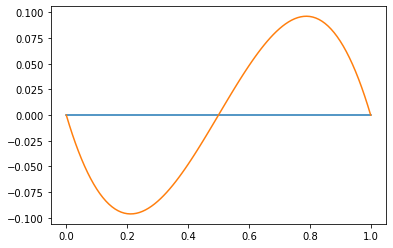

In [11]:
X = np.arange(0,1.01,0.01)
Y = [ 3*p*p - 2*p*p*p - p for p in X ]
plt.plot([0,1],[0,0])
plt.plot(X,Y)